In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr   

dados_spread_bancario = pd.read_csv('/home/brenno/Documentos/videos_youtube/dados_youtube/bcdata.sgs.27445.csv',
                                    sep = ";", decimal=",")
taxa_selic_historica = pd.read_csv('//home/brenno/Documentos/videos_youtube/dados_youtube/taxa_selic_apurada.csv'
                                    )
dados_cotacoes = pd.read_excel('/home/brenno/Documentos/videos_youtube/dados_youtube/cotacoes_bancos.xlsx')
lucro_bancos = pd.read_excel('/home/brenno/Documentos/videos_youtube/dados_youtube/lucroliquido_bancos.xlsx', 
                             na_values = "-")

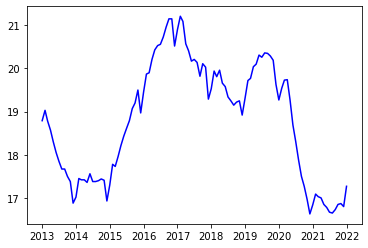

In [2]:
#spread ao longo do tempo

dados_spread_bancario['data'] = pd.to_datetime(dados_spread_bancario['data'], format='%d/%m/%Y')

plt.plot(dados_spread_bancario['data'], dados_spread_bancario['valor'], "b")


In [3]:
#cotacao x spread

dados_cotacoes = dados_cotacoes.set_index('Data')

dados_cotacoes_normalizado = (dados_cotacoes/dados_cotacoes.iloc[0]) * 100

dados_cotacoes_normalizado.drop(dados_cotacoes_normalizado.tail(3).index,inplace=True)



Text(0, 0.5, 'Spread Bancário')

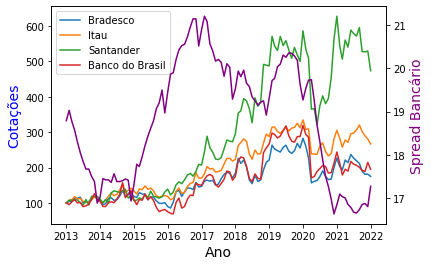

In [4]:
#gráfico cotacao x spread.

fig,ax = plt.subplots()

ax.plot(dados_spread_bancario['data'], dados_cotacoes_normalizado['BBDC3'], label = "Bradesco")
ax.plot(dados_spread_bancario['data'], dados_cotacoes_normalizado['ITUB3'], label = "Itau")
ax.plot(dados_spread_bancario['data'], dados_cotacoes_normalizado['SANB4'], label = "Santander")
ax.plot(dados_spread_bancario['data'], dados_cotacoes_normalizado['BBAS3'], label = "Banco do Brasil")
ax.set_xlabel("Ano",fontsize=14)
ax.set_ylabel("Cotações",color="blue",fontsize=14)

ax.legend()

ax2=ax.twinx()

ax2.plot(dados_spread_bancario['data'], dados_spread_bancario['valor'], color = "purple", label = "Spread")
ax2.set_ylabel("Spread Bancário",color="purple",fontsize=14)



In [5]:
#tratando dados selic.

taxa_selic_historica['taxa_final'] = taxa_selic_historica.iloc[:, 1].astype(str) + "." + taxa_selic_historica.iloc[:, 2].astype(str)

taxa_selic_historica['taxa_final'] = taxa_selic_historica['taxa_final'].astype(float)

taxa_selic_historica = taxa_selic_historica.drop(['Taxa (% a.a.)', 'Fator diário'], axis = 1)

taxa_selic_historica['Data'] = pd.to_datetime(taxa_selic_historica['Data'], format='%d/%m/%Y')

taxa_selic_historica = taxa_selic_historica.set_index('Data')

taxa_selic_historica.sort_index(ascending = False)

taxa_selic_historica

taxa_selic_historica = taxa_selic_historica.astype(float)

taxa_selic_historica_resample = taxa_selic_historica.resample("M").mean()

taxa_selic_historica_resample.drop(taxa_selic_historica_resample.tail(3).index,inplace=True)


Text(0, 0.5, 'Spread Bancário')

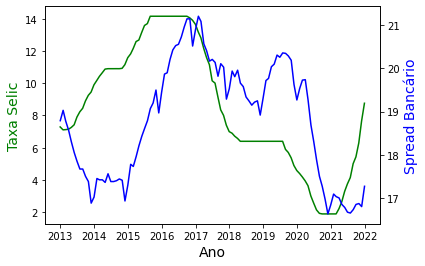

In [6]:
#grafico selic x spread.

fig,ax = plt.subplots()

ax.plot(taxa_selic_historica_resample, color = "green")
ax.set_xlabel("Ano",fontsize=14)
ax.set_ylabel("Taxa Selic",color="green",fontsize=14)

ax2=ax.twinx()

ax2.plot(dados_spread_bancario['data'], dados_spread_bancario['valor'], color = "blue")
ax2.set_ylabel("Spread Bancário",color="blue",fontsize=14)

In [7]:
#tratando dados de spread para trimestral e calculando média de lucro dos bancos.

dados_spread_bancario_resample = dados_spread_bancario.set_index('data')
dados_spread_bancario_resample = dados_spread_bancario_resample.resample('Q').mean()

lucro_bancos = lucro_bancos.set_index('Data')
lucro_bancos = lucro_bancos.dropna()
media_lucro_bancos = lucro_bancos.mean(axis = 1)

Text(0, 0.5, 'Spread Bancário')

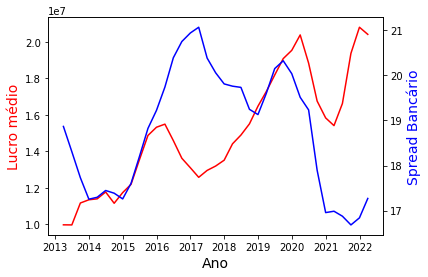

In [8]:
#gráfico média de lucro x spread bancário.

fig,ax = plt.subplots()

ax.plot(dados_spread_bancario_resample.index, media_lucro_bancos, color = "red")
ax.set_xlabel("Ano",fontsize=14)
ax.set_ylabel("Lucro médio",color="red",fontsize=14)

ax2=ax.twinx()

ax2.plot(dados_spread_bancario_resample.index, dados_spread_bancario_resample.values, color = "blue", label = "Spread")
ax2.set_ylabel("Spread Bancário",color="blue",fontsize=14)

In [11]:
#correlação entre lucro e spread bancário. 

dados_spread_bancario_resample = dados_spread_bancario_resample.squeeze()

pearsonr(dados_spread_bancario_resample.values, media_lucro_bancos.values)[0]

0.030413629208161375